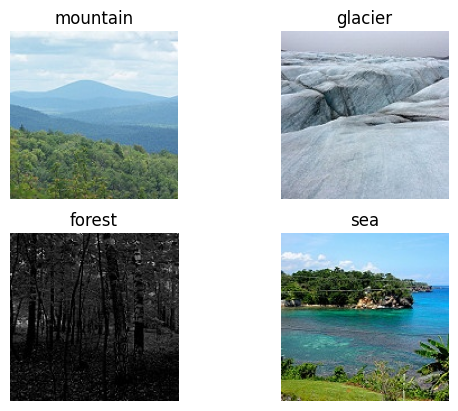

In [1]:
from lbm.datasets.intel_images import Prepocessor
import matplotlib.pyplot as plt

processor = Prepocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

for x, y in train_loader:
    for j in range(4):
        plt.subplot(2, 2, j + 1)
        plt.imshow(x[j].permute(1, 2, 0).numpy())
        plt.axis('off')
        plt.title(processor.class_name(y[j]))
    plt.show()
    break

In [2]:
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from lbm.workflow import avg_accuracy
from lbm.devices import get_device

def validate_model(model, epochs):
    optimizer = optim.SGD(model.parameters())
    loss_fn = nn.CrossEntropyLoss()
    train_losses, val_losses = train_and_validate(
        model,
        train_loader,
        val_loader,
        optimizer,
        loss_fn,
        epochs=epochs,
        device=get_device()
    )
    plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
    plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    accuracy = avg_accuracy(model, val_loader, targets_one_hot=False, 
                            device=get_device())
    print(f'Accuracy: {accuracy:.2%}')
    return accuracy


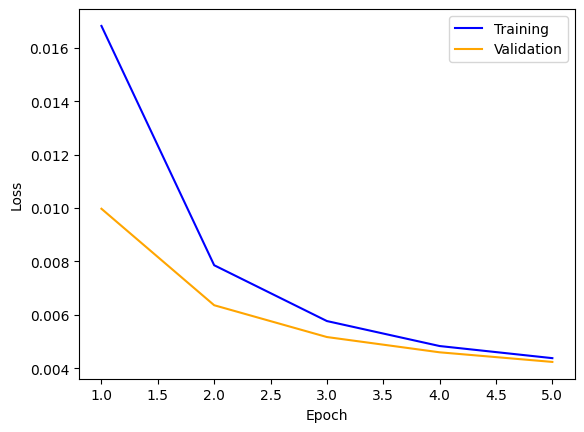

Accuracy: 90.73%


0.9073333144187927

In [3]:
from lbm.models import Resnet18
model = Resnet18(len(processor.class_names))
validate_model(model, epochs=5)

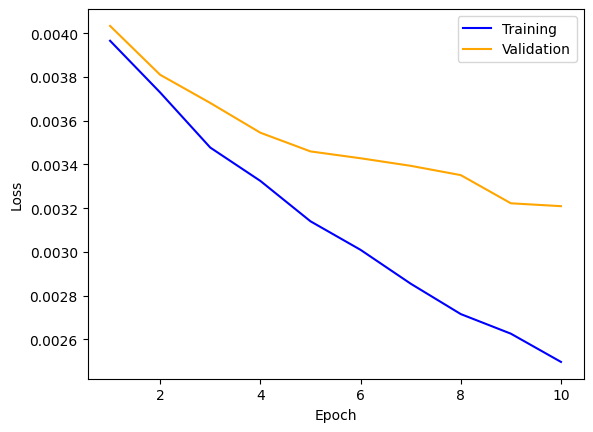

Accuracy: 92.60%


0.9259999990463257

In [4]:
validate_model(model, epochs=10)